Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1

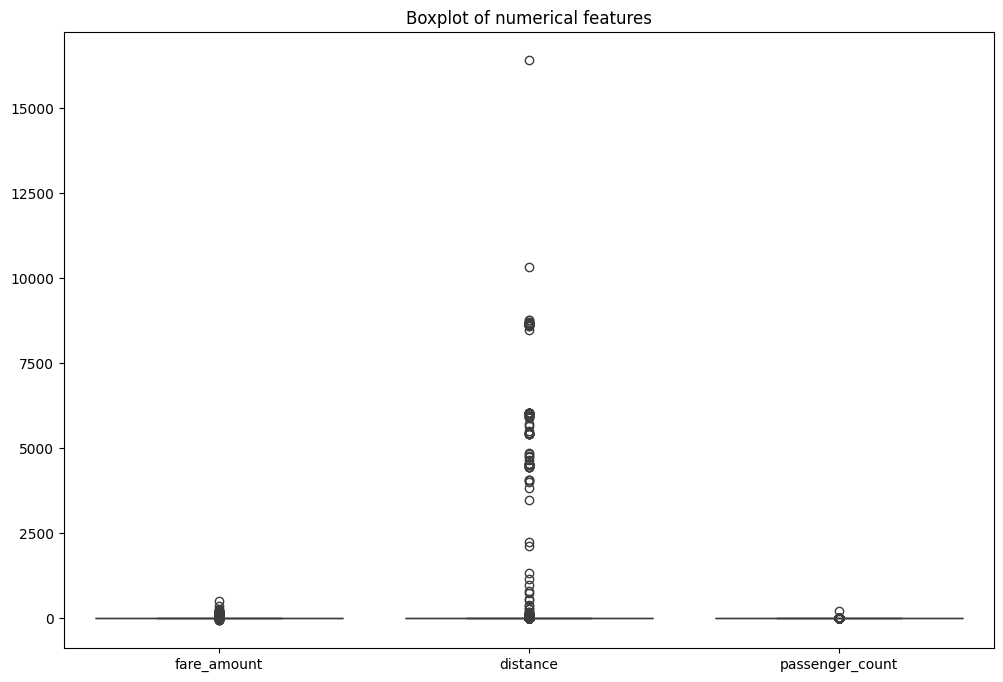

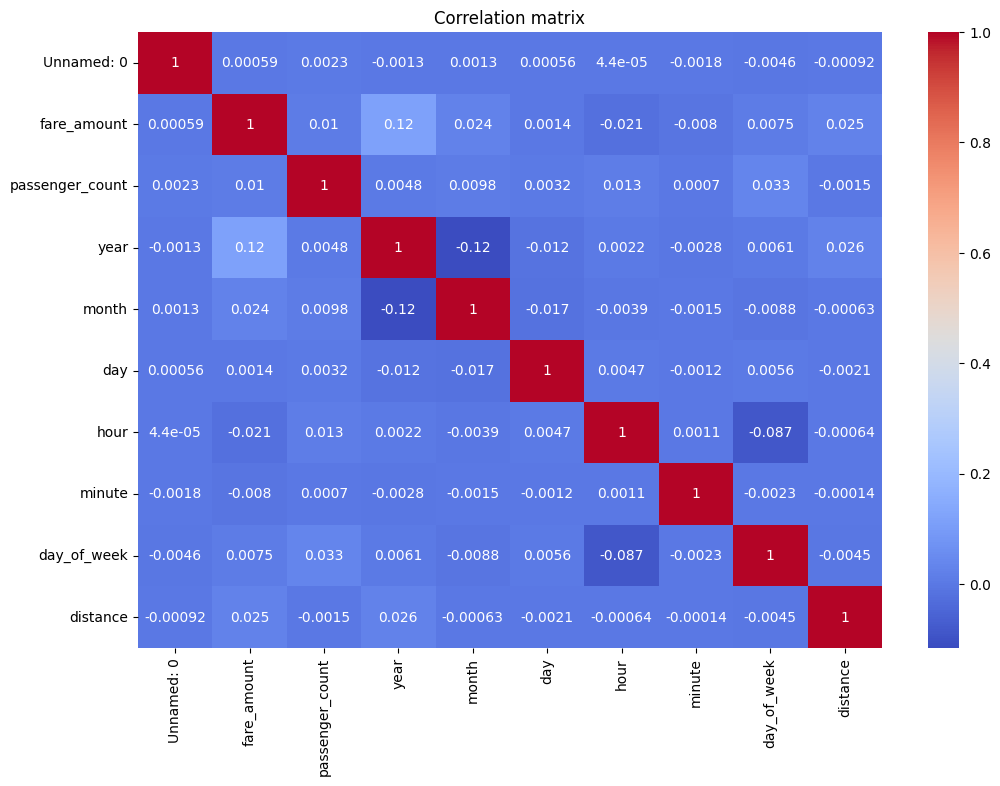

Linear Regression RMSE: 10.113124844730253
Linear Regression R2 Score: 0.016809977400425002
Random Forest Regression RMSE: 5.739216546105705
Random Forest Regression R2 Score: 0.6833555003855174

Comparison of Models:
----------------------------------------
Linear Regression - RMSE: 10.11, R2: 0.02
Random Forest Regression - RMSE: 5.74, R2: 0.68


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/uber.csv'
df = pd.read_csv(file_path)


print(df.head())

# 1. Pre-process the dataset
# Converting 'pickup_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extracting features from 'pickup_datetime'
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df = df.drop(['key', 'pickup_datetime'], axis=1)

# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers.
    return c * r

# Calculating the distance between pickup and dropoff points
df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                           df['dropoff_longitude'], df['dropoff_latitude'])

# Dropping the original longitude and latitude columns
df = df.drop(['pickup_longitude', 'pickup_latitude',
              'dropoff_longitude', 'dropoff_latitude'], axis=1)

# Handling missing values if any
df = df.dropna()

# 2. Identifying outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['fare_amount', 'distance', 'passenger_count']])
plt.title('Boxplot of numerical features')
plt.show()

# 3. Checking the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# 4. Implementing Linear Regression and Random Forest Regression models
# Defining features (X) and target (y)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Evaluating the models
# Evaluation for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print('Linear Regression RMSE:', rmse_lr)
print('Linear Regression R2 Score:', r2_lr)

# Evaluation for Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest Regression RMSE:', rmse_rf)
print('Random Forest Regression R2 Score:', r2_rf)

# Compare models
print(f"\nComparison of Models:\n{'-'*40}")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest Regression - RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")
